In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define a custom encoder
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8 + 10, 256)  # Input size is image + label embedding
        self.fc2 = nn.Linear(256, latent_dim)
        self.fc3 = nn.Linear(256, latent_dim)

    def forward(self, x, label_embedding):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.cat([x, label_embedding], dim=1)
        x = torch.relu(self.fc1(x))
        mu = self.fc2(x)
        logvar = self.fc3(x)
        return mu, logvar

# Define a custom decoder
class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + 10, 256)  # Input size is latent variable + label embedding
        self.fc2 = nn.Linear(256, 64 * 8 * 8)
        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1)

    def forward(self, z, label_embedding):
        z = torch.cat([z, label_embedding], dim=1)
        z = torch.relu(self.fc1(z))
        z = torch.relu(self.fc2(z))
        z = z.view(z.size(0), 64, 8, 8)
        z = torch.relu(self.deconv1(z))
        z = torch.sigmoid(self.deconv2(z))
        return z


In [19]:
# CIFAR-10 data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # Mean and std values for CIFAR-10
])

batch_size = 16

cifar10_train = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
cifar10_test = datasets.CIFAR10('./data', train=False, download=True, transform = transform)
test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=True)


Files already downloaded and verified
Files already downloaded and verified


In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [25]:


# Define the VAE model
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x, label_embedding):
        mu, logvar = self.encoder(x, label_embedding)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decoder(z, label_embedding)
        return recon_x, mu, logvar


In [29]:
# One-hot encoding for labels
num_classes = 10
label_embeddings = torch.eye(num_classes)

# Initialize the VAE model
latent_dim = 64  # Adjust as needed
vae = VAE(latent_dim).to(device)

In [30]:

# Loss function: reconstruction loss + KL divergence loss
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 3, 32, 32), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Optimizer
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [1/20], Loss: -171000.5045275


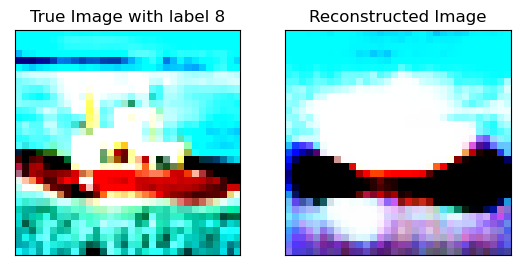

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


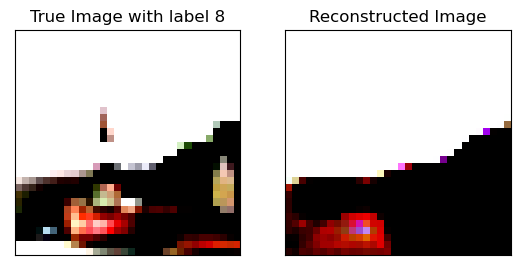

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


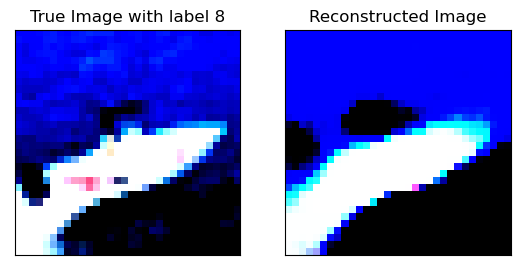

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [2/20], Loss: -175969.4266075


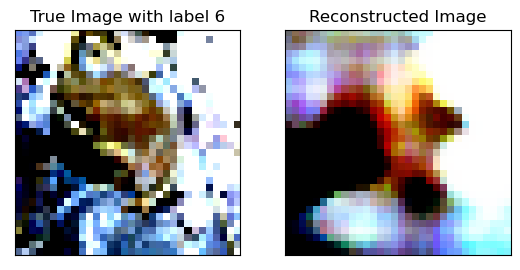

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


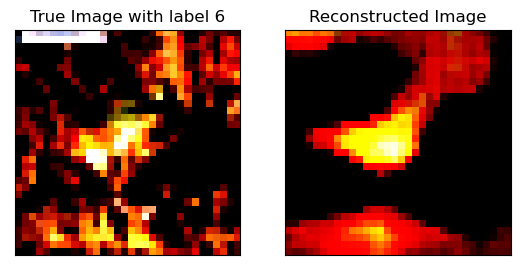

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


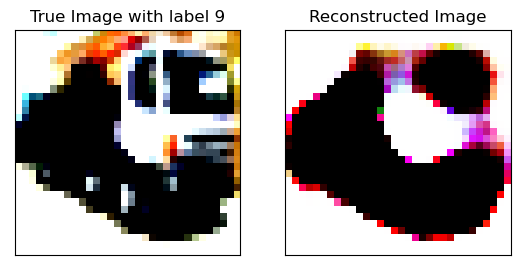

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [3/20], Loss: -178707.9327675


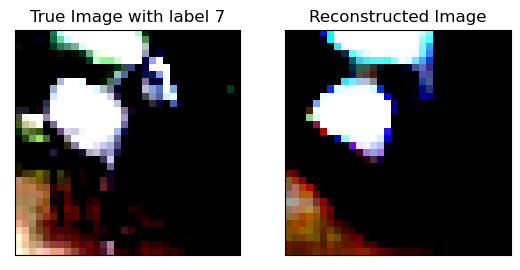

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


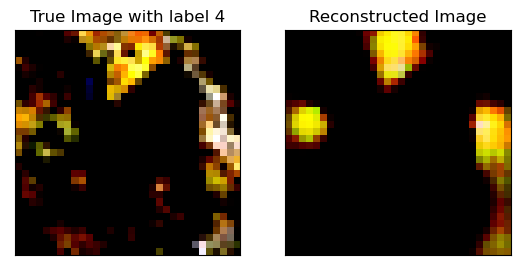

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


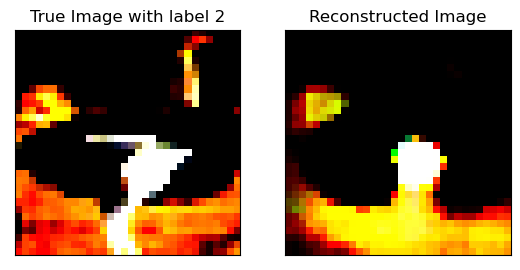

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [4/20], Loss: -180782.1342275


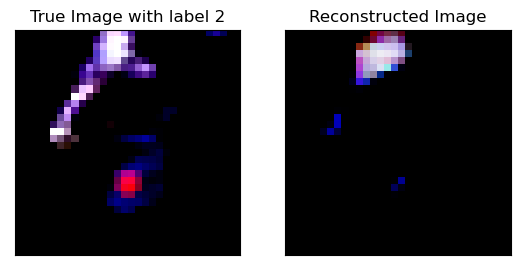

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


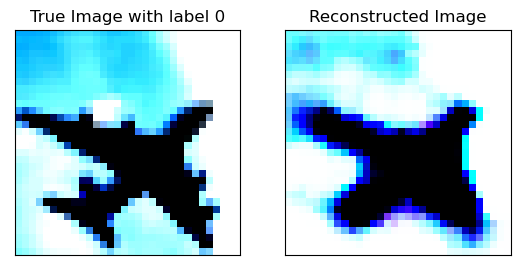

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


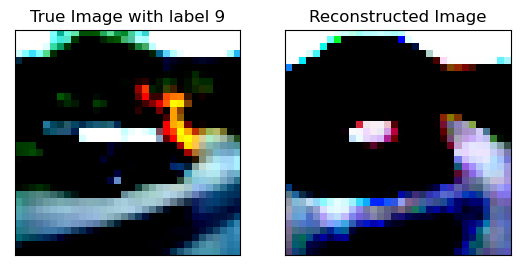

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [5/20], Loss: -182314.0481


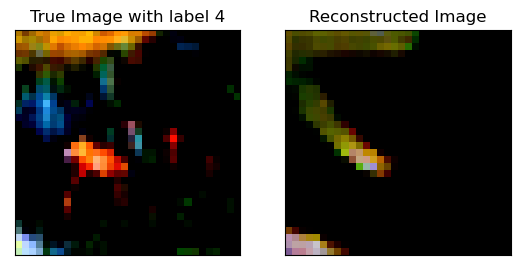

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


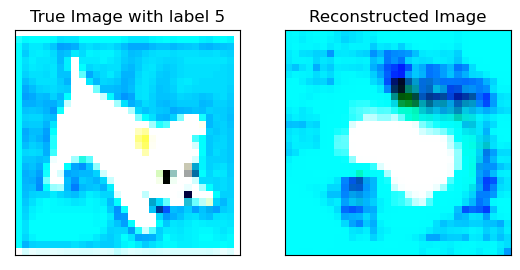

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


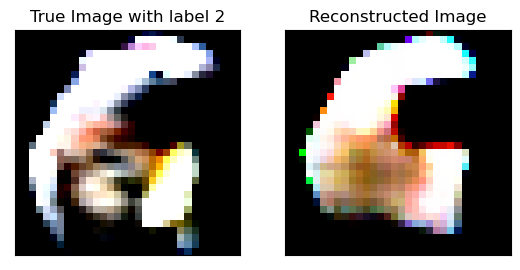

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [6/20], Loss: -183454.4913925


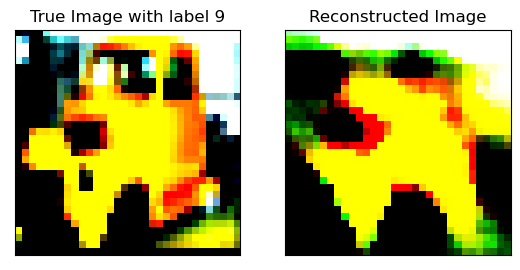

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


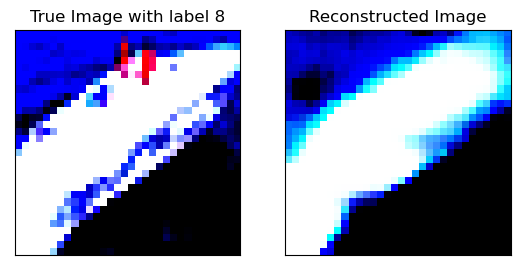

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


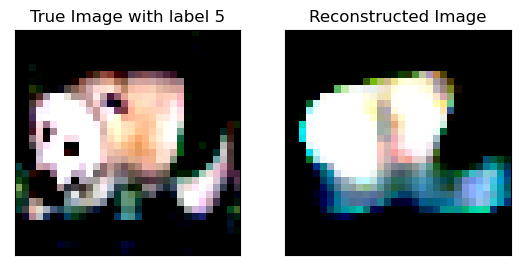

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [7/20], Loss: -184303.812


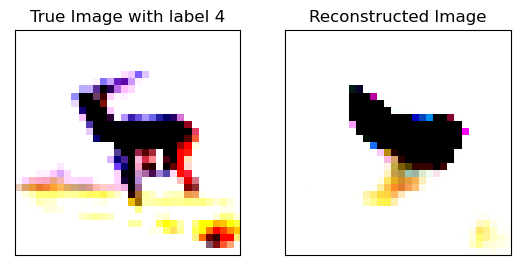

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


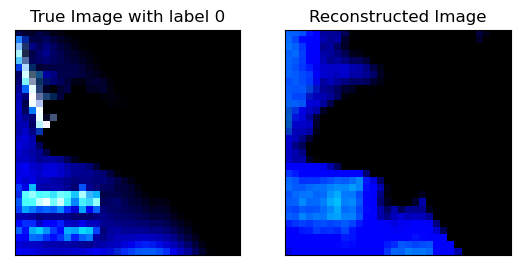

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


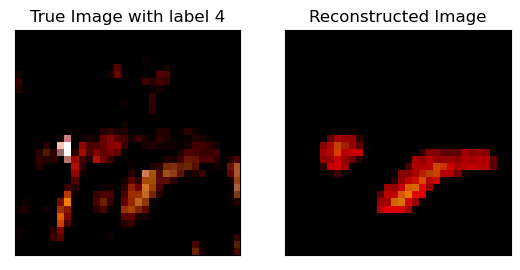

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [8/20], Loss: -184948.6411675


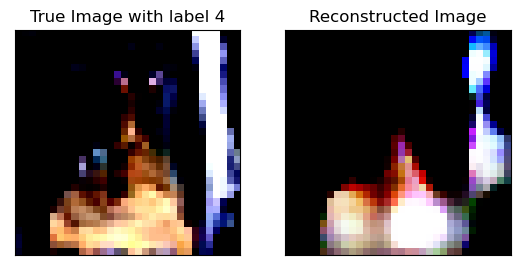

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


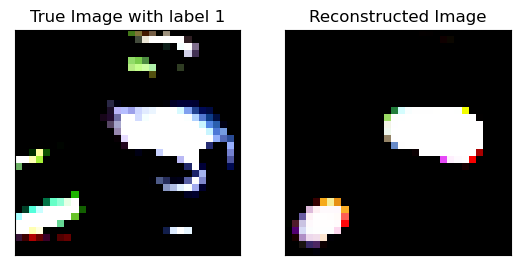

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


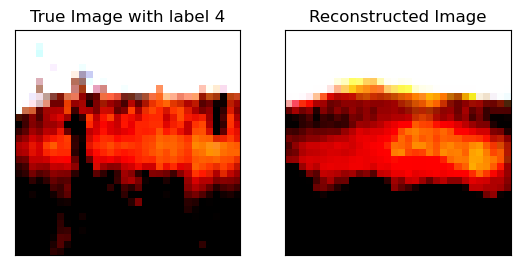

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [9/20], Loss: -185502.08471


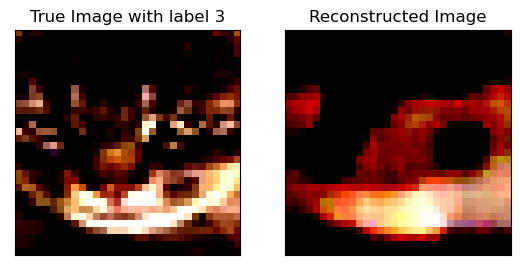

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


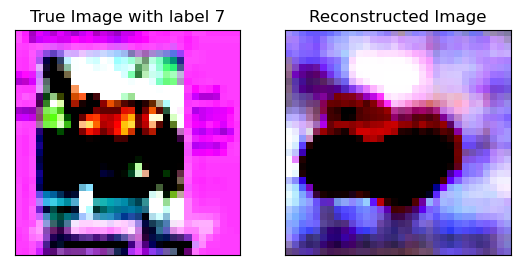

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


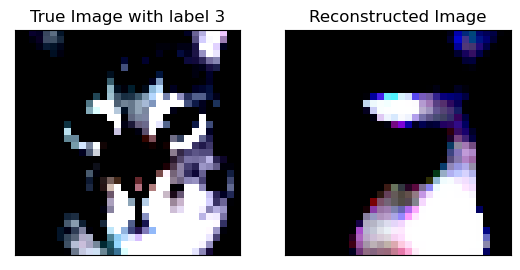

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [10/20], Loss: -185913.013825


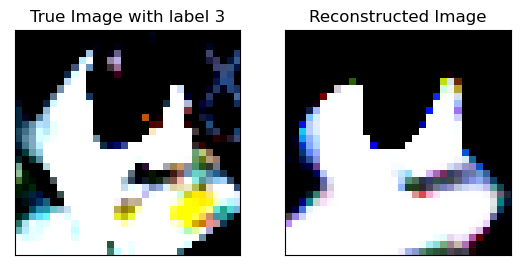

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


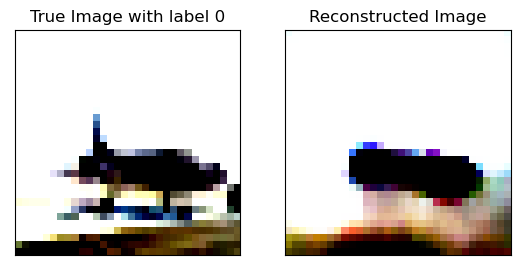

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


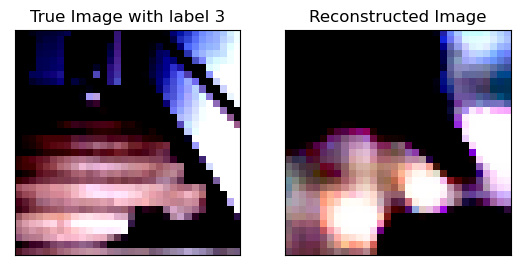

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [11/20], Loss: -186300.5052725


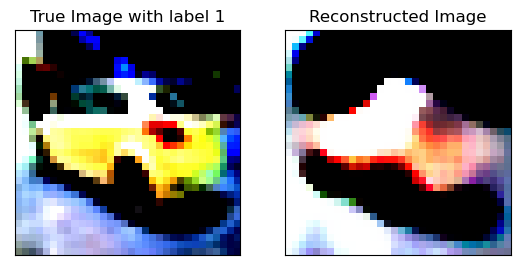

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


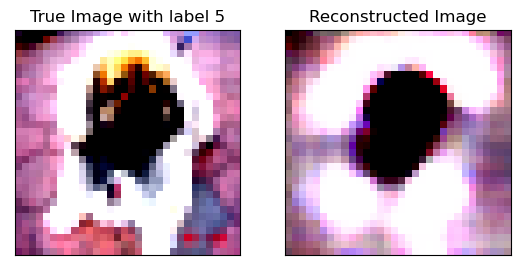

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


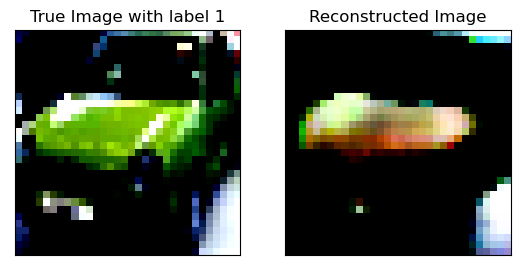

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [12/20], Loss: -186732.51376


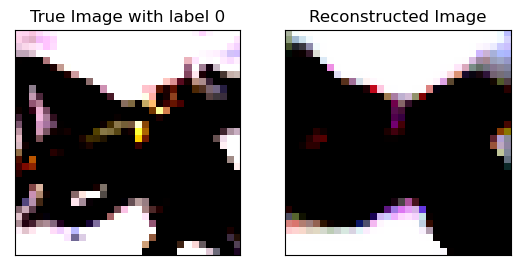

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


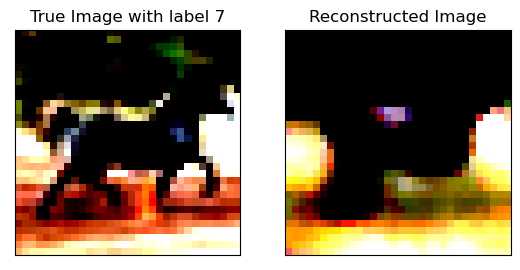

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


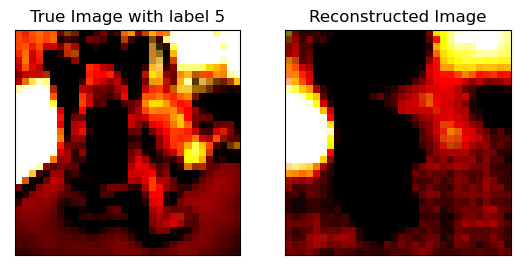

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [13/20], Loss: -187121.032635


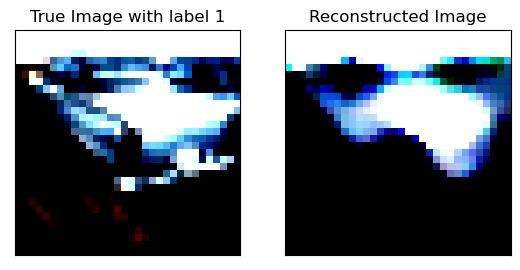

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


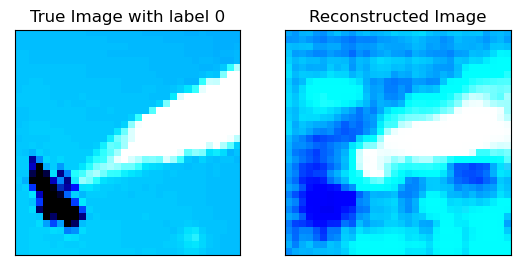

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


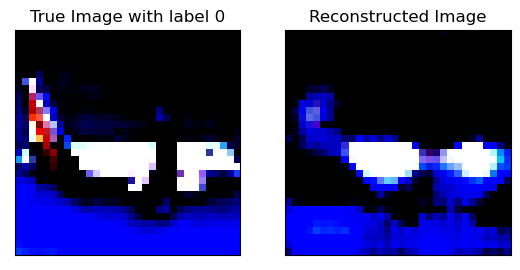

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [14/20], Loss: -187417.3113675


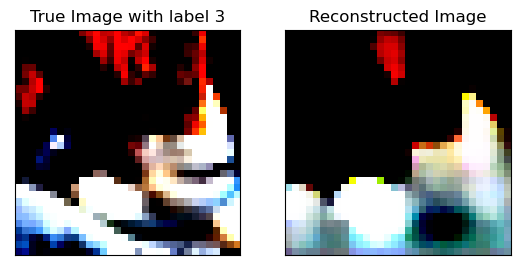

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


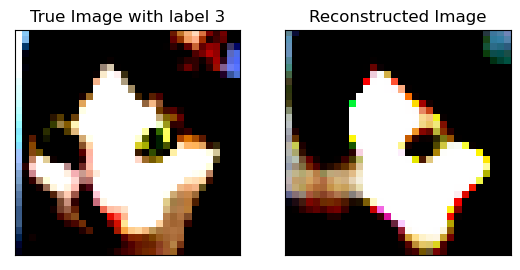

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


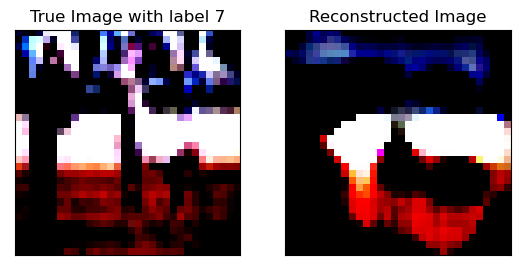

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [15/20], Loss: -187689.6409375


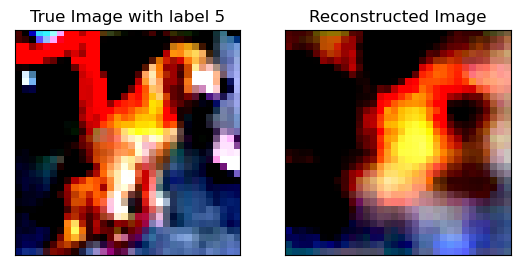

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


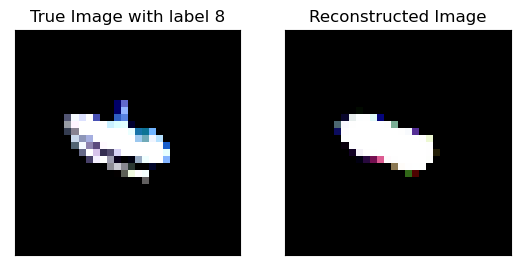

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


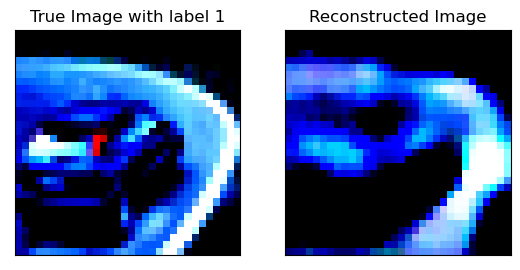

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [16/20], Loss: -187942.000295


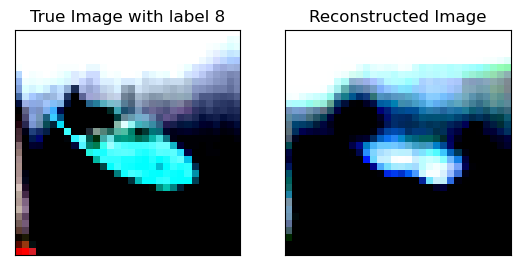

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


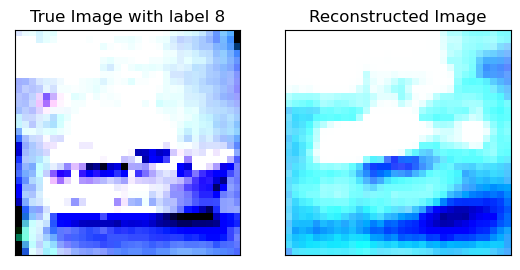

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


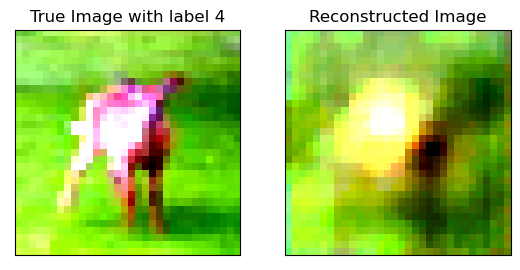

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [17/20], Loss: -188246.0444025


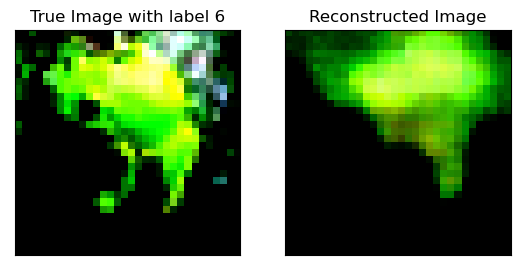

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


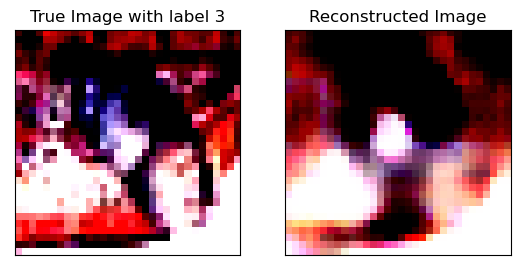

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


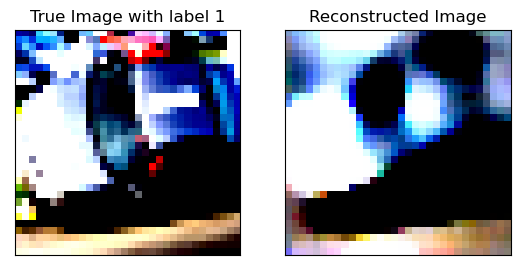

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [18/20], Loss: -188558.4431325


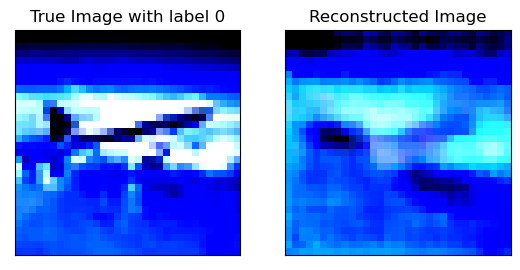

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


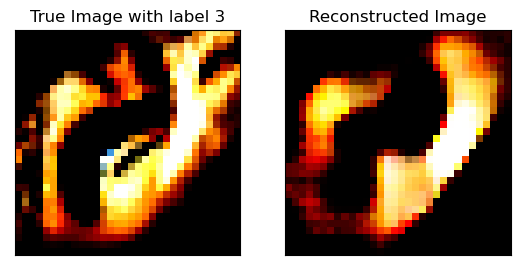

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


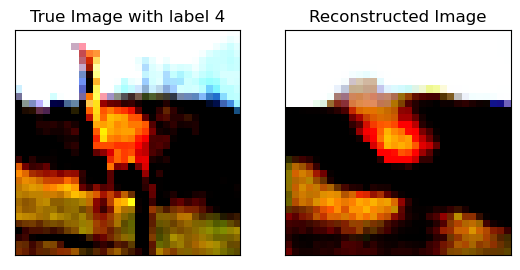

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [19/20], Loss: -188815.513815


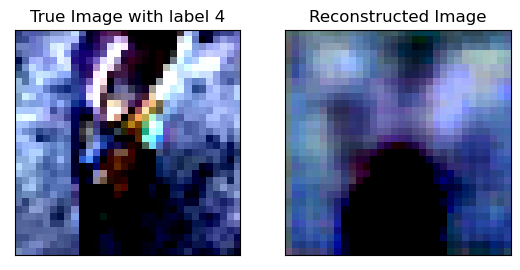

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


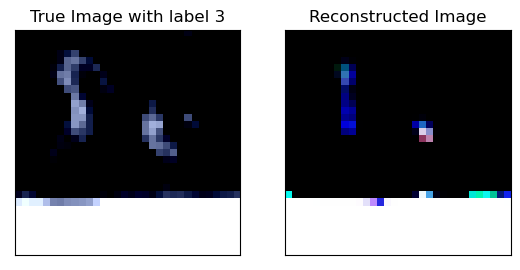

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


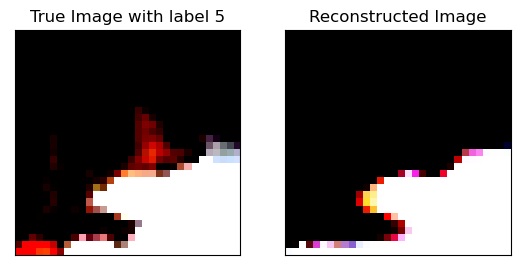

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [20/20], Loss: -189064.5929375


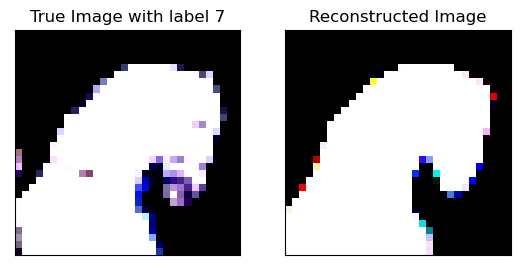

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


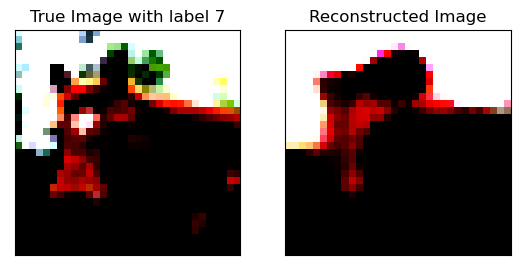

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


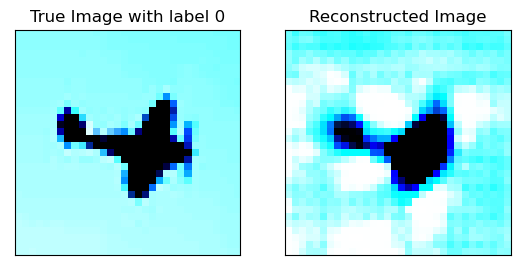

Training finished.


In [34]:
# Training and testing loop
num_epochs = 20  # Adjust as needed

vae.train()
for epoch in range(num_epochs):
    train_loss = 0
    for batch_idx, (data, label) in enumerate(train_loader):
        data, label = data.to(device), label
        optimizer.zero_grad()

        # Convert labels to one-hot embeddings
        label_embedding = label_embeddings[label].to(device)

        # Forward pass
        recon_batch, mu, logvar = vae(data, label_embedding)

        # Compute the loss
        loss = loss_function(recon_batch, data, mu, logvar)

        # Backpropagation
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss / len(train_loader.dataset)}')

    # Testing and saving generated images (optional)
    with torch.no_grad():
        vae.eval()
        images, labels = next(iter(test_loader))

        images, labels = images[:3].to(device), labels[:3].to(device)

        for idx, (img, lbl) in enumerate(zip(images, labels)):

            label_emb = label_embeddings[lbl].to(device)
            label_emb = label_emb.reshape(1, -1)
            img = img.unsqueeze(0)
            recon_output, mu, log_var = vae(img, label_emb)
            plt.subplot(1, 2, 1)
            plt.imshow(img.cpu().squeeze().permute(1, 2, 0).numpy())
            plt.title(f'True Image with label {lbl}')
            plt.grid('off')
            plt.xticks([])
            plt.yticks([])

            plt.subplot(1, 2, 2)
            plt.imshow(recon_output.cpu().squeeze().permute(1, 2, 0).detach().numpy())
            plt.title('Reconstructed Image')
            plt.grid('off')
            plt.xticks([])
            plt.yticks([])

            plt.show()

        

# Save the trained model (optional)
# torch.save(vae.state_dict(), 'vae_model.pth')

print('Training finished.')


## Let's test the trained VAE model with 32 images from the Test loader 
### 1. With correct Label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


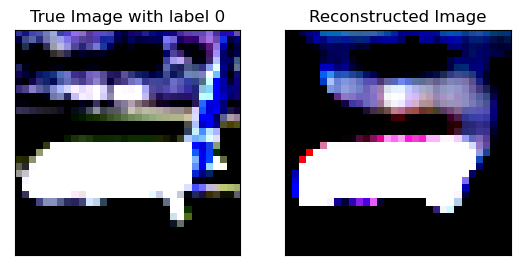

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


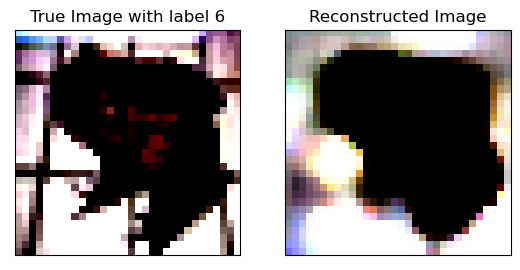

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


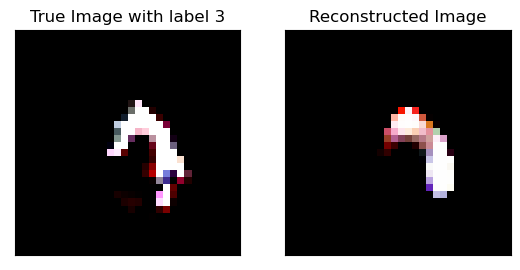

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


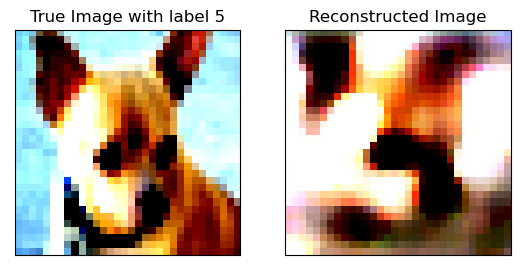

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


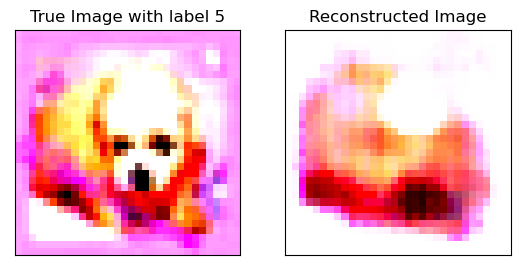

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


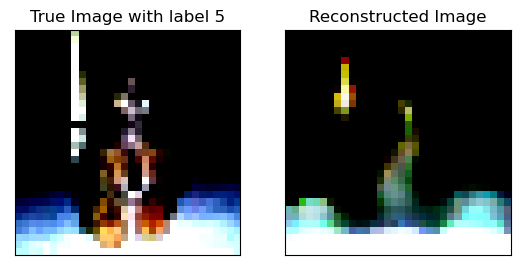

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


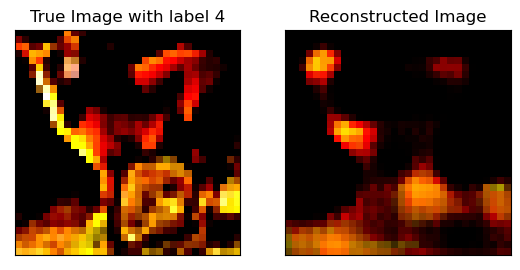

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


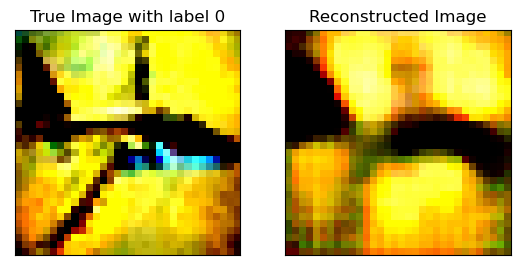

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


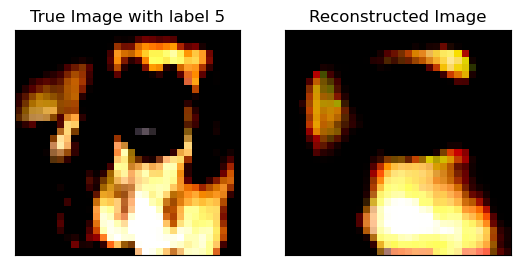

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


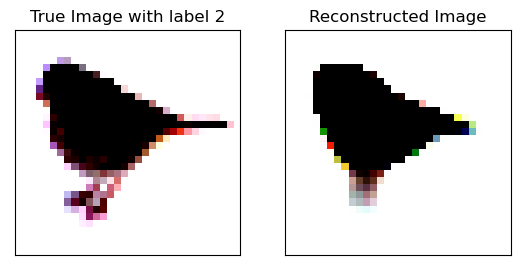

torch.Size([1, 3, 32, 32]) torch.Size([1, 10])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32])


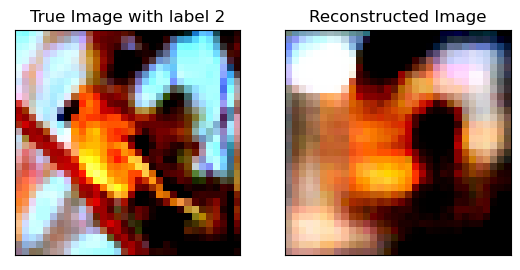

torch.Size([1, 3, 32, 32]) torch.Size([1, 10])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32])


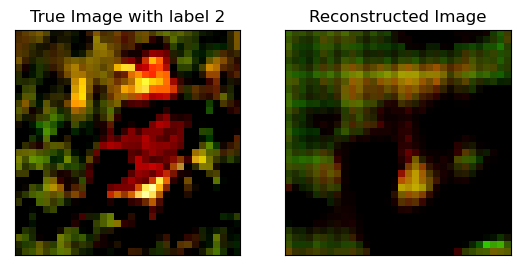

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


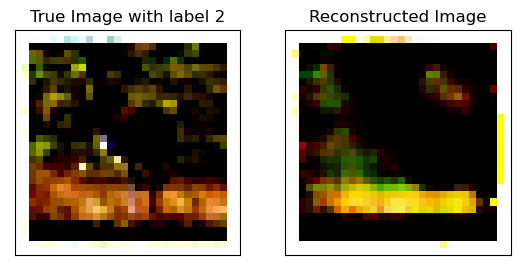

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


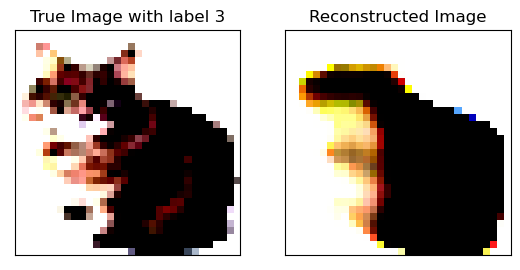

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


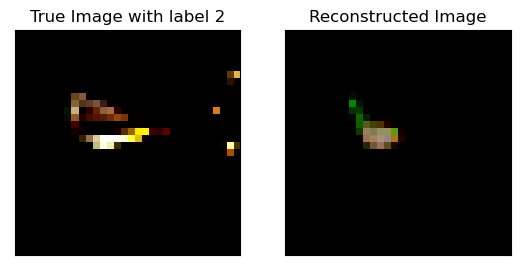

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32]) torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


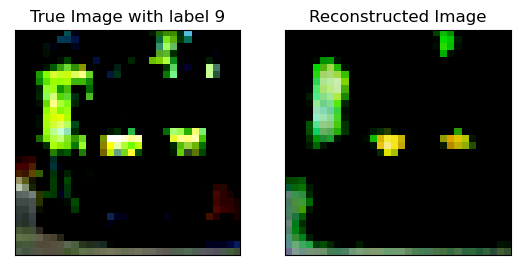

In [37]:
img, lbl = next(iter(test_loader))

for idx, (img, lbl) in enumerate(zip(img, lbl)):
    label_emb =label_embeddings[lbl]
    # recon_batch, mu, logvar = vae(img, label_emb)

    img, label_emb = img.to(device), label_emb.to(device)
    label_emb = label_emb.reshape(1, -1)
    img = img.unsqueeze(0)
    print(img.shape, label_emb.shape)

    recon_output, mu, log_var = vae(img, label_emb)
    print(recon_output.shape)

    plt.subplot(1, 2, 1)
    plt.imshow(img.cpu().squeeze().permute(1, 2, 0).numpy())
    plt.title(f'True Image with label {lbl}')
    plt.grid('off')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(recon_output.cpu().squeeze().permute(1, 2, 0).detach().numpy())
    plt.title('Reconstructed Image')
    plt.grid('off')
    plt.xticks([])
    plt.yticks([])

    plt.show()
    

In [59]:
def plot_results(image, true_label, wrong_label, recon_output):
    plt.subplot(1, 2, 1)
    plt.imshow(image.cpu().squeeze().permute(1, 2, 0).numpy())
    plt.title(f'True L: {true_label} with Wrong L:{wrong_label}')
    plt.grid('off')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(recon_output.squeeze().cpu().permute(1, 2, 0).detach().numpy())
    plt.title(f'Reconst Img for {wrong_label}')
    plt.grid('off')
    plt.xticks([])
    plt.yticks([])

    plt.show()

In [60]:
# Label Mapping

label_mapper = {0: "airplane",
1: "automobile",
2: "bird",
3: "cat",
4: "deer",
5: "dog",
6: "frog",
7: "horse",
8: "ship",
9: "truck"}

In [65]:
images_dict = {}
counter = 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


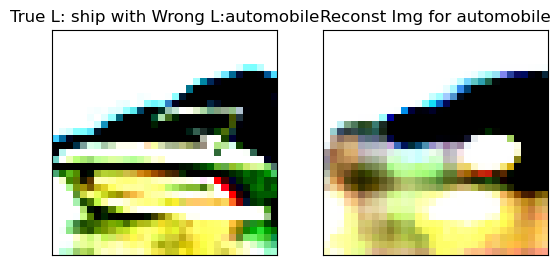

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


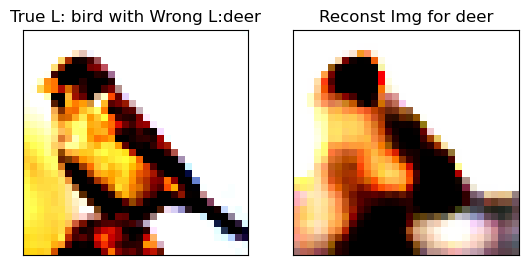

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


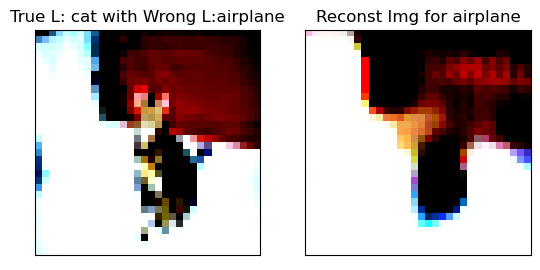

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


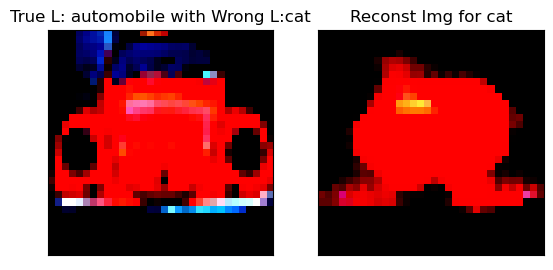

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


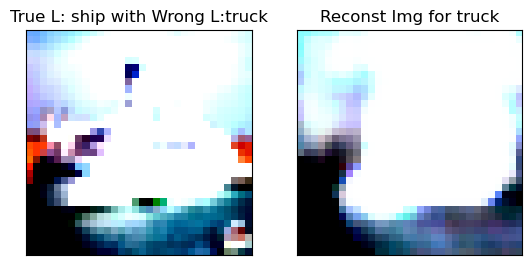

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


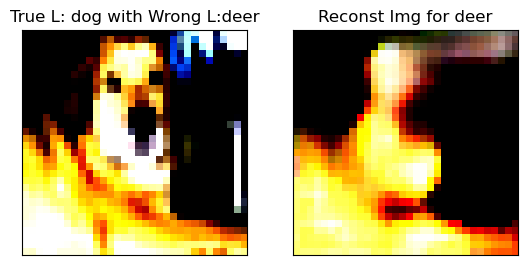

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


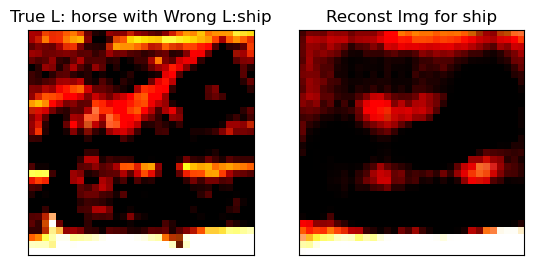

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


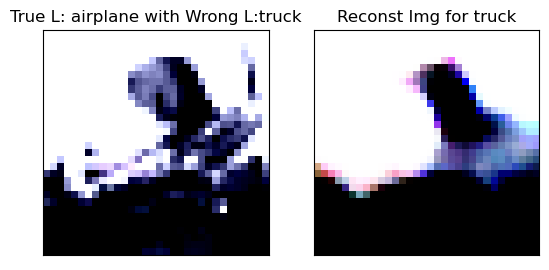

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


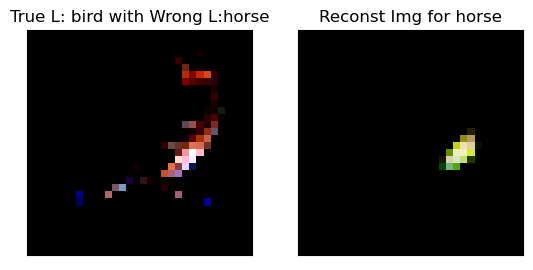

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


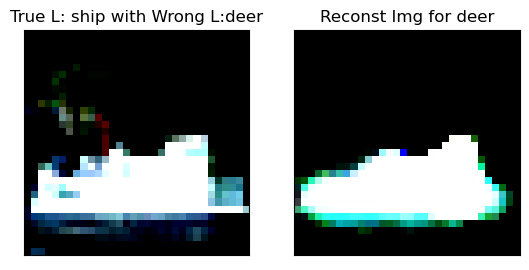

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


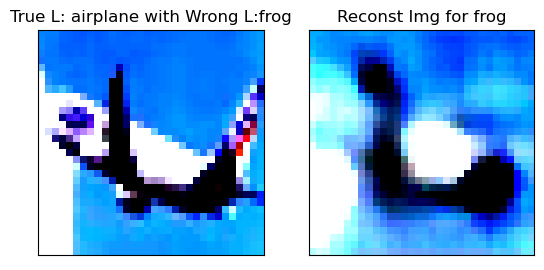

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


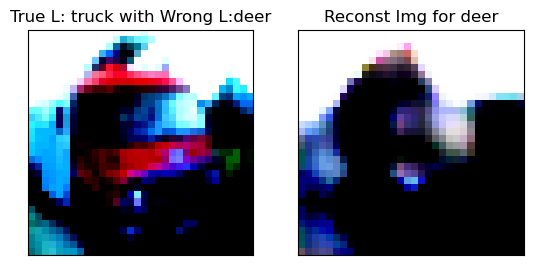

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


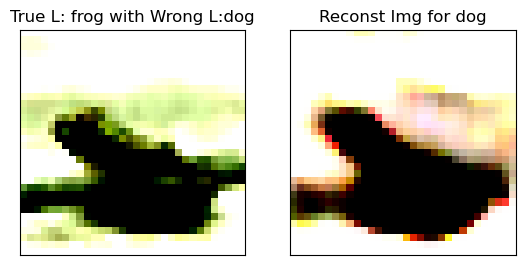

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


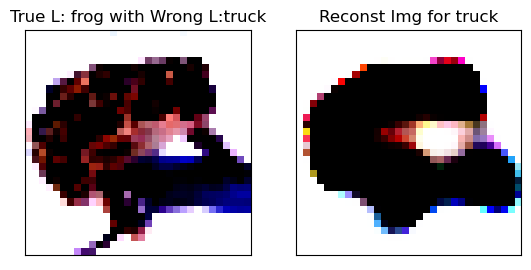

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


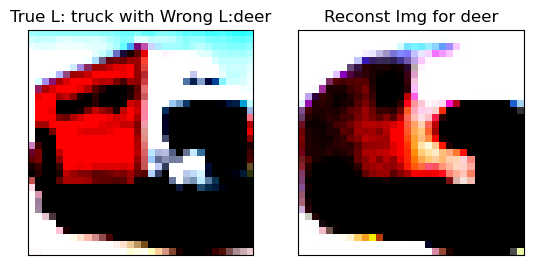

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


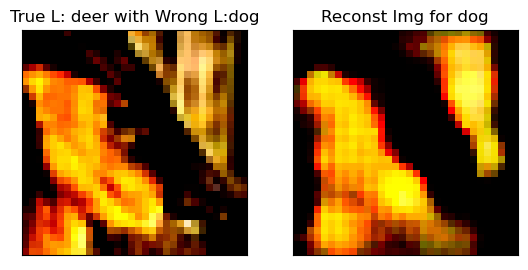

In [68]:

image, label = next(iter(test_loader))


for idx, (image, label) in enumerate(zip(image, label)):
    
#     print(f"True Label: {label}")


    
    fake_label_choices = [ i for i in range(10) if i != label]
    fake_label = np.random.choice(fake_label_choices)
    
#     print(f"Wrong Label: {fake_label}")
    image = image.unsqueeze(0).to(device)
    wrong_label_embedding = label_embeddings[fake_label]
    wrong_label_embedding = wrong_label_embedding.reshape(1, -1).to(device)
    
    # print(image.shape, wrong_label_embedding.shape)

    recon_output, mu, logvar = vae(image, wrong_label_embedding)
    recon_output = recon_output
    # print(recon_output.shape)
    plot_results(image, label_mapper[label.item()], label_mapper[fake_label], recon_output)
    
    
    
    images_dict[counter] = {'image': image, 'label': label, 'fake_label': fake_label, 'recon': recon_output}
    counter += 1
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

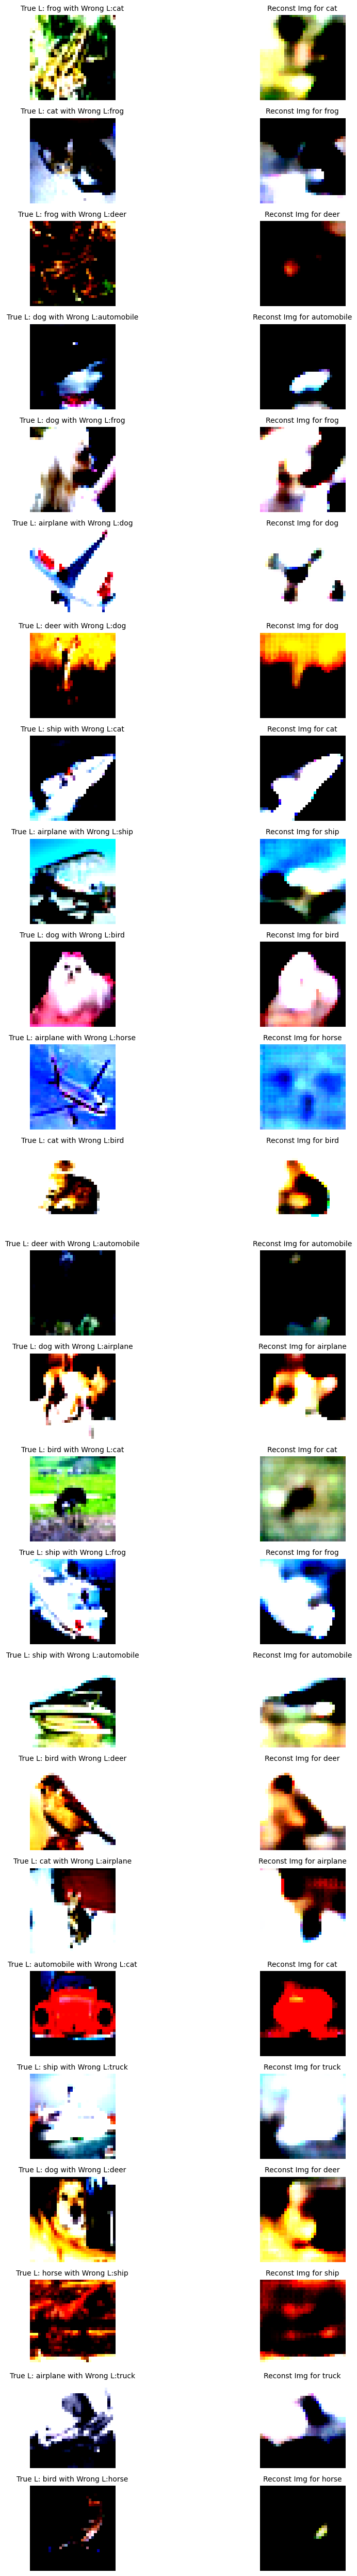

In [74]:
num_rows = 25
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 50))

for i in range(num_rows):
    
    image, label, fake_label, rec = images_dict[i].values()
    
    ax = axs[i, 0]
    ax.imshow(image.cpu().squeeze().permute(1, 2, 0).numpy())
    ax.set_title(f'True L: {label_mapper[label.item()]} with Wrong L:{label_mapper[fake_label]}', fontsize=10)
    ax.axis('off')
    
    ax = axs[i, 1]
    ax.imshow(rec.cpu().squeeze().permute(1, 2, 0).detach().numpy())
    ax.set_title(f'Reconst Img for {label_mapper[fake_label]}', fontsize=10)
    
    ax.axis('off')

plt.tight_layout()
plt.show()